### Libraries

In [31]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
import openml
#our neural network
from neuralnetwork import Network,FCLayer,ActivationLayer,sigmoid,sigmoid_prime,tanh,tanh_prime,categorical_cross_entropy,categorical_cross_entropy_prime,mse,mse_prime,binary_cross_entropy,binary_cross_entropy_prime,relu,relu_prime
import time
#sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, ConfusionMatrixDisplay, precision_score, make_scorer
from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
import itertools
from imblearn.over_sampling import RandomOverSampler

from neuralnetwork import Network,FCLayer,ActivationLayer
from neuralnetwork import sigmoid,sigmoid_prime,tanh,tanh_prime,categorical_cross_entropy,categorical_cross_entropy_prime,mse,mse_prime,softmax,softmax_prime


### Data

In [2]:
# loading the data
congress = pd.read_csv('data/CongressionalVotingID.shuf.lrn.csv')

In [3]:
congress.head(5)

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,249,republican,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,140,democrat,y,n,y,n,n,y,y,y,y,n,n,n,n,n,y,y
2,383,democrat,y,y,n,y,y,y,n,n,n,n,y,n,y,y,n,unknown
3,201,democrat,n,n,y,n,n,n,y,y,y,n,n,n,n,y,y,y
4,297,republican,n,n,y,y,y,y,n,n,n,y,n,y,y,y,y,y


In [4]:
#Counting the number of samples for each class
print("Number of samples that belong to republican: ", str(len(congress[congress['class']=='republican'])),len(congress[congress['class']=='republican'])/len(congress), '%')
print("Number of samples that belong to democrat: ", str(len(congress[congress['class']=='democrat'])),len(congress[congress['class']=='democrat'])/len(congress), '%')

Number of samples that belong to republican:  81 0.37155963302752293 %
Number of samples that belong to democrat:  137 0.6284403669724771 %


##### Preparing the data

In [5]:
congress['class'] = congress['class'].map({'democrat': 1, 'republican': 0})

In [6]:
X = congress.drop(['class','ID'], axis=1)
Y = congress['class']

In [7]:
from sklearn.preprocessing import LabelEncoder

# Perform integer encoding
label_encoder = LabelEncoder()
for col in X.columns:
    X[col] = label_encoder.fit_transform(X[col])
X = X.to_numpy()

encoder = OneHotEncoder(sparse = False)
y_reshaped = Y.to_numpy().reshape(-1,1)
Y = encoder.fit_transform(y_reshaped)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
#splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

#splitting into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state = 1234)


### Our Neural Network Implementation

#### Rectified Linear function in the hidden layers & Sigmoid Function in the outer layers

Since the sigmoid function must be used in the output layer when  building a binary classifier, we used relu in the hidden layers.


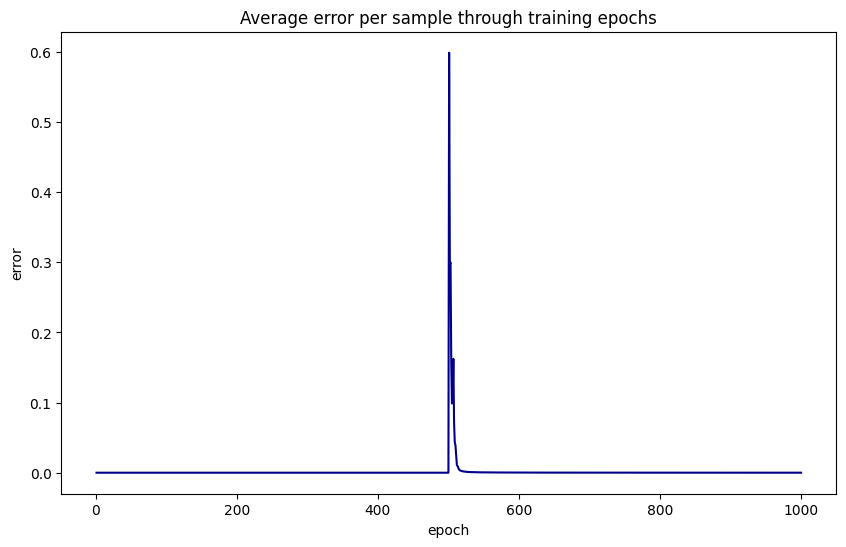

In [18]:
seed = 1234
# network with 2 layers
net = Network()
net.add(FCLayer(16, 10,seed =  1234))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10,2,seed = 1234))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net.plot_error_curve(err_vect)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.8888888888888888
##################################################
Balanced Accuracy on train:  1.0
Balanced Accuracy on test:  0.9166666666666667
##################################################
Recall on train:  1.0
Recall on test:  0.8333333333333334
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


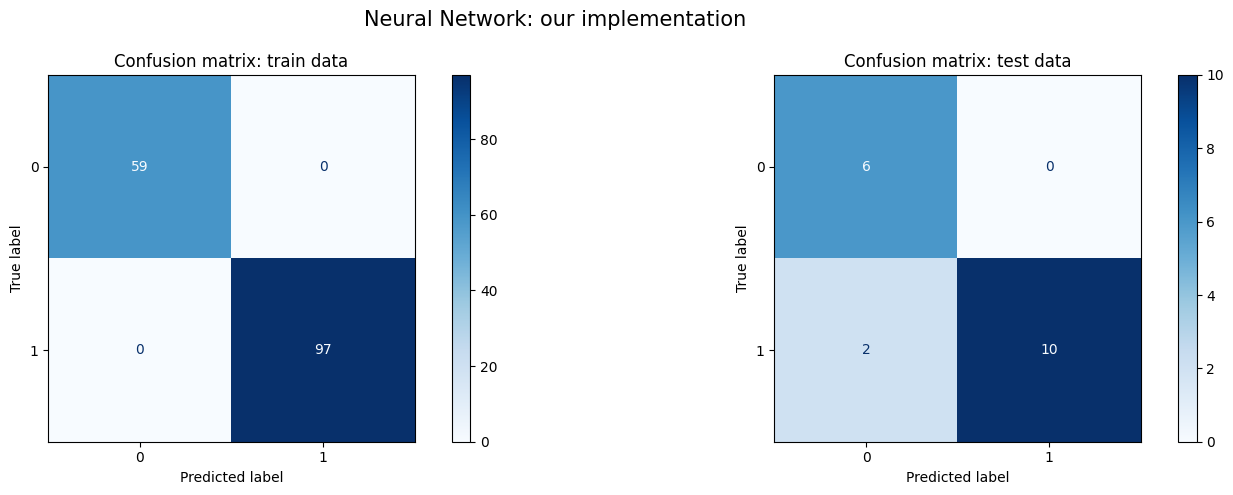

In [19]:
net.nn_evaluate_binary(x_train= X_train, y_train=y_train, x_test=X_val, y_test=y_val, epochs=500, learning_rate=0.1)

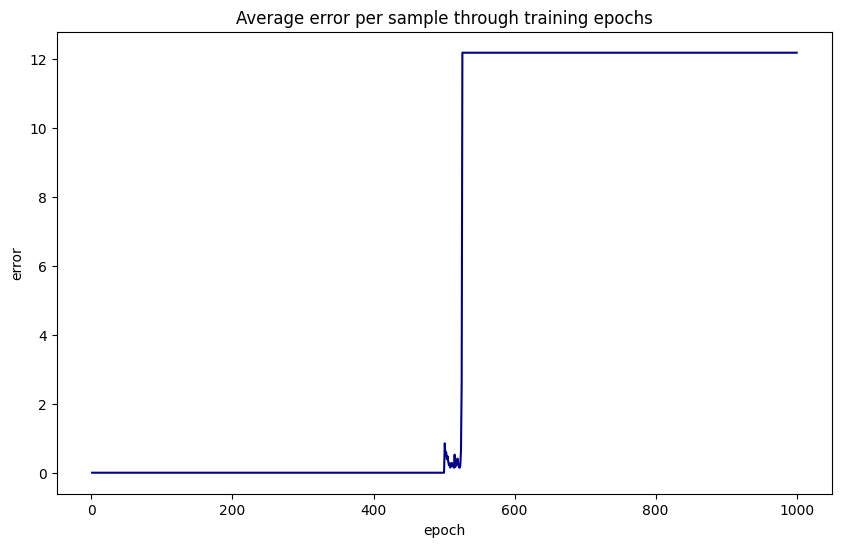

In [20]:
# network with 3 layers
net = Network()
net.add(FCLayer(16, 10,seed = seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10, 10,seed= seed))  
net.add(ActivationLayer(relu, relu_prime))
net.add(FCLayer(10,2,seed = seed))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net.plot_error_curve(err_vect)

##################################################
Accuracy on train:  0.6217948717948718
Accuracy on test:  0.6666666666666666
##################################################
Balanced Accuracy on train:  0.5
Balanced Accuracy on test:  0.5
##################################################
Recall on train:  1.0
Recall on test:  1.0
##################################################
Precision on train:  0.6217948717948718
Precision on test:  0.6666666666666666
##################################################


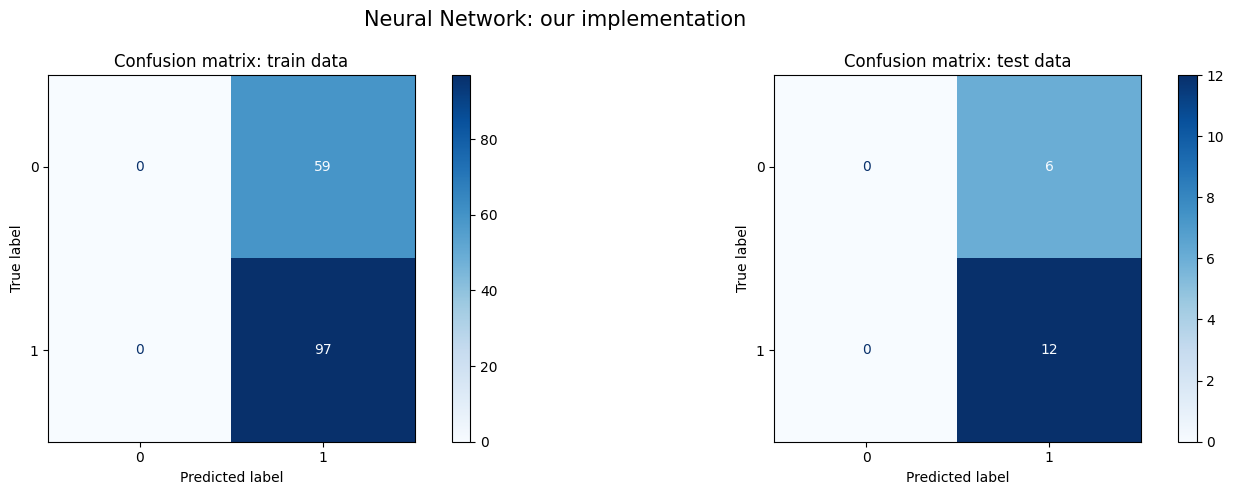

In [21]:
net.nn_evaluate_binary(x_train= X_train, y_train=y_train, x_test=X_val, y_test=y_val, epochs=500, learning_rate=0.1)

### Sigmoid activation function in the outer layer only

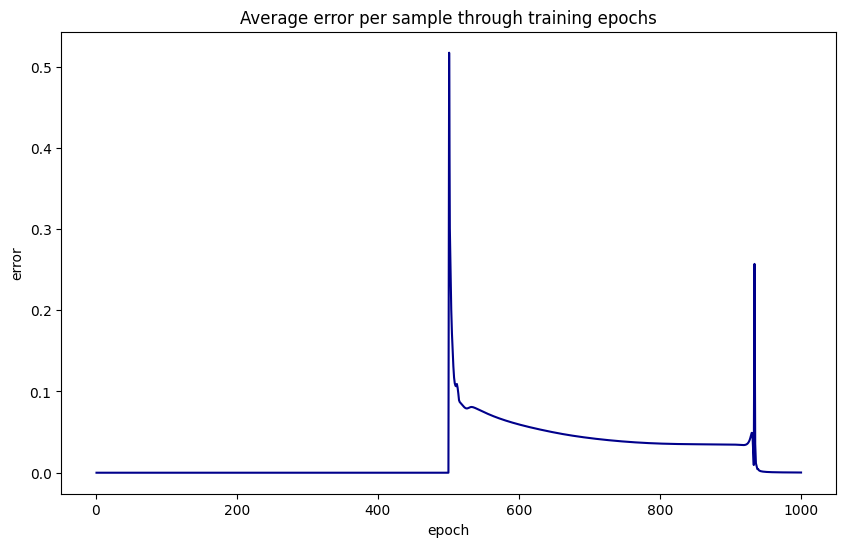

In [22]:
# network with 2 layers
net = Network()
net.add(FCLayer(16, 10,seed =  1234))  
net.add(FCLayer(10,2,seed = 1234))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net.plot_error_curve(err_vect)

##################################################
Accuracy on train:  1.0
Accuracy on test:  0.8888888888888888
##################################################
Balanced Accuracy on train:  1.0
Balanced Accuracy on test:  0.9166666666666667
##################################################
Recall on train:  1.0
Recall on test:  0.8333333333333334
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


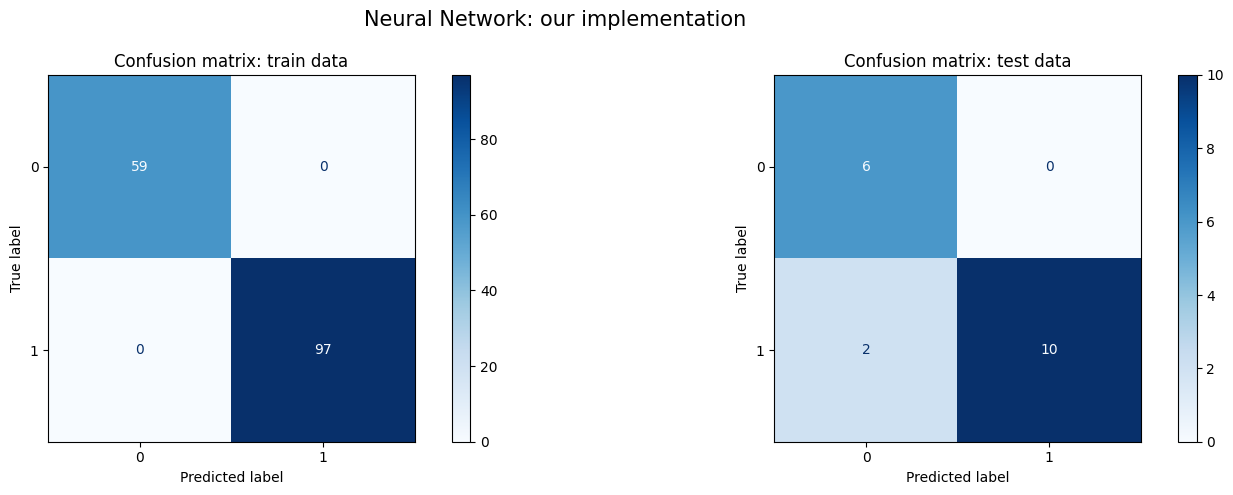

In [23]:
net.nn_evaluate_binary(x_train= X_train, y_train=y_train, x_test=X_val, y_test=y_val, epochs=500, learning_rate=0.1)

/Users/nadia/Desktop/TUSS23/ML/Exercise 2/MachineLearningEx2/neuralnetwork.py:308: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


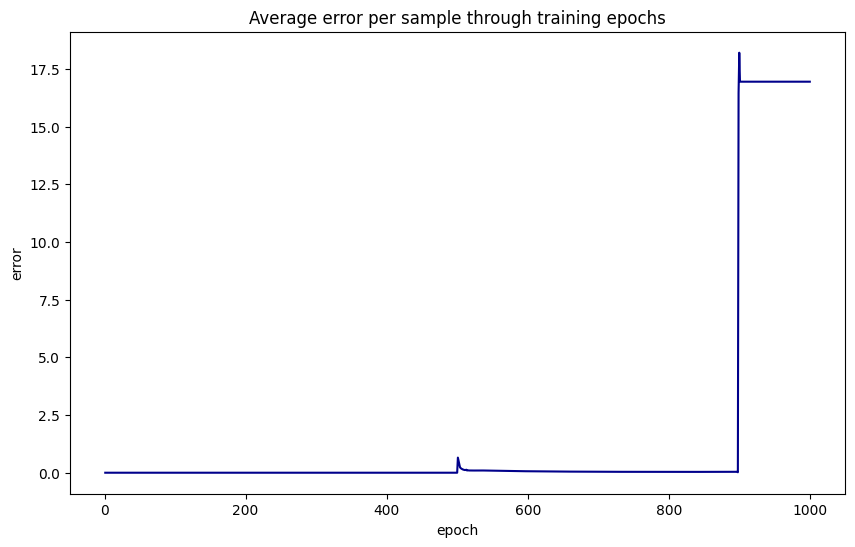

In [24]:
# network with 3 layers
net = Network()
net.add(FCLayer(16, 10,seed =  seed))  
net.add(FCLayer(10,10,seed = seed))
net.add(FCLayer(10,2,seed = seed))  
net.add(ActivationLayer(sigmoid, sigmoid_prime))

# train
net.use(binary_cross_entropy, binary_cross_entropy_prime)

err_vect = net.fit(X_train, y_train, epochs=500, learning_rate=0.1)
net.plot_error_curve(err_vect)

##################################################
Accuracy on train:  0.4551282051282051
Accuracy on test:  0.5
##################################################
Balanced Accuracy on train:  0.5618556701030928
Balanced Accuracy on test:  0.625
##################################################
Recall on train:  0.12371134020618557
Recall on test:  0.25
##################################################
Precision on train:  1.0
Precision on test:  1.0
##################################################


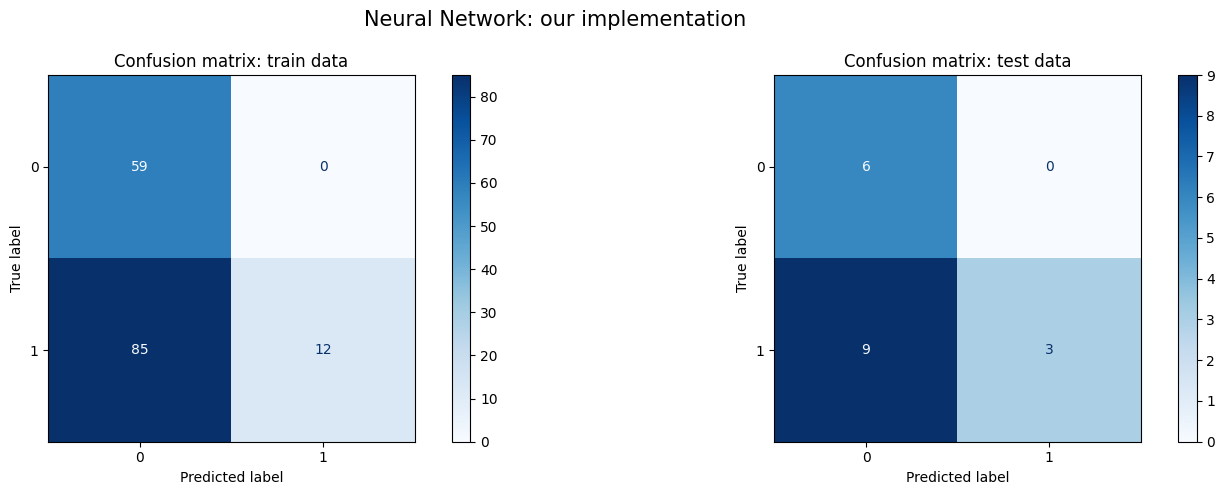

In [25]:
net.nn_evaluate_binary(x_train= X_train, y_train=y_train, x_test=X_val, y_test=y_val, epochs=500, learning_rate=0.1)

### Cross Validation to find best number of nodes and layers

In [34]:
# Defining the parameters
node_numbers = [5,10,15,20]
layer_numbers = [2,3,4,5]
activation  = ['relu','softmax']
input_size = 16
output_size = 2
seed = 1234

In [35]:
start = time.time()
accuracy_dict = {}
# Perform cross-validation for each hyperparameter combination
for nodes, layers,activation in itertools.product(node_numbers, layer_numbers, activation):
    # Initialize an array to store the performance metrics for each fold
    accuracy_scores = []
    # Create a KFold instance
    kf = KFold(n_splits=10, shuffle=True,random_state = 1234)

    # Iterate over the folds
    for train_index, val_index in kf.split(X_train):
        # Split the data into training and validation sets
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Initialize and train your neural network with the current hyperparameters
        net = Network()
        net.add(FCLayer(input_size, nodes,seed = seed))
        if activation == 'softmax':
            for _ in range(layers - 1):
                net.add(FCLayer(nodes, nodes,seed = seed))
        else:
            for _ in range(layers - 1):
                net.add(FCLayer(nodes, nodes,seed = seed))
                net.add(ActivationLayer(relu, relu_prime))
        net.add(FCLayer(nodes, output_size,seed = seed))
        net.add(ActivationLayer(softmax, softmax_prime))
        net.use(binary_cross_entropy, binary_cross_entropy_prime)

        # # Train the network
        net.fit(X_train_fold, y_train_fold, epochs=200, learning_rate=0.1)
        y_val_pred = net.predict(X_val_fold)
        y_val_pred = np.concatenate(y_val_pred)

        # Convert one-hot encoded predictions back to class labels
        y_val_pred_labels = np.argmax(y_val_pred, axis=1)
        y_val_labels = np.argmax(y_val_fold, axis=1)

        accuracy = accuracy_score(y_val_labels,y_val_pred_labels)
        accuracy_scores.append(accuracy)

    accuracy_dict[(nodes, layers,activation)] = accuracy_scores
end = time.time()

print("Time needed to run cross validation for best number of layers and nodes "+ str((end-start)/60)+ " minutes.")

Time needed to run cross validation for best number of layers and nodes 41.7604939699173 minutes.


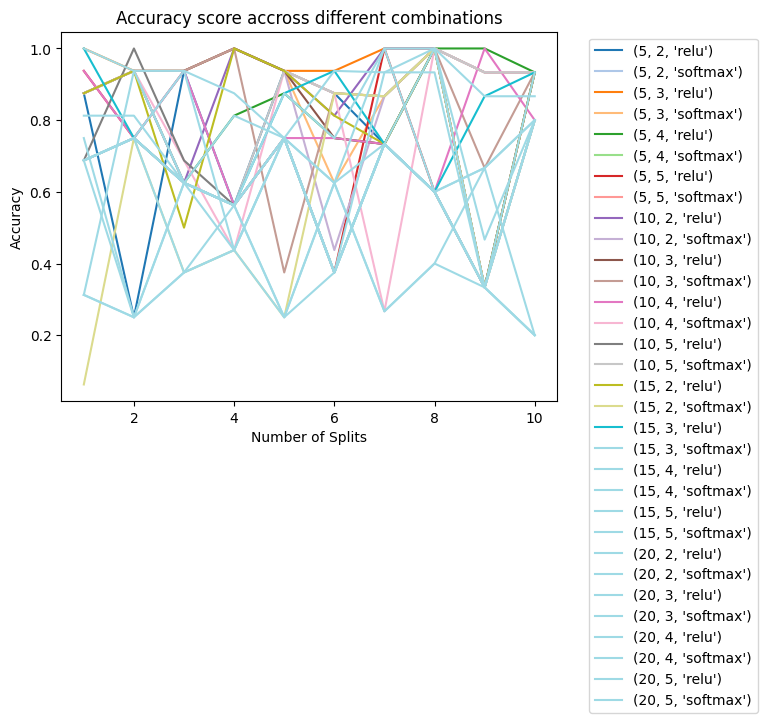

In [37]:
cmap = plt.get_cmap('tab20')
for i,c in enumerate(accuracy_dict):
   color = cmap(i)
   plt.plot(np.arange(1, len(accuracy_dict[c])+1, 1), accuracy_dict[c], '-', label=str(c),color = color)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Accuracy score accross different combinations")
plt.ylabel('Accuracy')
plt.xlabel('Number of Splits')
plt.show()